In [11]:
import pandas as pd
import trompy as tp
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# open metafile 
rows_BW, header=tp.metafilereader('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Metafile_VGP2.2.xls',sheetname='BW')

File is excel file. Making csv metafile first


In [68]:
BW_data={}

for row in rows_BW: 
    key=row[0]+ '_' + row[1]
    
    BW_data[key]={}
    BW_data[key]['mouse']=row[0]
    BW_data[key]['day']= float(row[6])
    BW_data[key]['diet']= row[3]
    BW_data[key]['BW']= row[2]
    BW_data[key]['group']=row[7]
    
    

In [69]:
mice=[]

for key in BW_data.keys(): 
    d=BW_data[key]
    mouseid=d['mouse']
    if mouseid not in mice: mice.append(mouseid)

In [70]:
BW_list=[]
day_list=[]
diet=[]
for mouse in mice: 
    temp_diet=[]
    temp_PR=[]
    temp_dayPR=[]
    temp_NR =[]
    temp_dayNR=[]
    
    for key in BW_data.keys():
        d=BW_data[key]
        if d['mouse']== mouse and d['day'] > 0: 
            temp_diet.append(d['group'])
            temp_PR.append(d['BW'])
            temp_dayPR.append(d['day'])

    diet.append(temp_diet[0])        
    BW_list.append(temp_PR)
    day_list.append(temp_dayPR)

In [71]:
mice

['VGP118',
 'VGP202',
 'VGP203',
 'VGP204',
 'VGP302',
 'VGP305',
 'VGP306',
 'VGP307',
 'VGP310']

In [72]:
diet

['PR', 'NR', 'PR', 'NR', 'PR', 'NR', 'PR', 'PR', 'NR']

In [142]:
PR_BW=[]
NR_BW=[]
for animal, group in zip(BW_list, diet): 
    if group == 'PR': 
        PR_BW.append(animal)
    elif group == 'NR': 
        NR_BW.append(animal)
        
        
PR_day=[]
NR_day=[]
for day, group in zip(day_list, diet): 
    if group == 'PR':
        PR_day.append(day)
    elif group == 'NR': 
        NR_day.append(day)

In [131]:
PR = [sum(animal) / len(animal) for animal in zip(*PR_BW)]
NR = [sum(animal) / len(animal) for animal in zip(*NR_BW)]
day = [sum(animal) / len(animal) for animal in zip(*NR_day)]

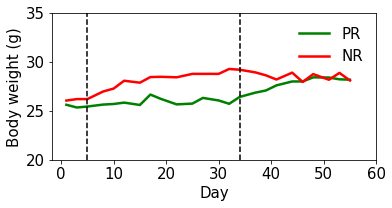

In [209]:
f, ax= plt.subplots(figsize=(6,3))
f.subplots_adjust(wspace=0.15, bottom=0.2, left=0.15)
ax.plot(day,PR,color='Green',label='PR',linewidth=2.5)
ax.plot(day,NR, color='Red', label = 'NR',linewidth=2.5)

ax.set_yticks([20,25,30,35])
ax.set_yticklabels([20,25,30,35], fontsize = 15)

ax.set_xticks([0,10,20,30,40,50,60])
ax.set_xticklabels([0,10,20,30,40,50,60], fontsize = 15)

ax.legend(fontsize= 15,frameon = False)


ax.axvline(5, color='black', linestyle= 'dashed', label='Diet NR/PR')
ax.axvline(34, color='black', linestyle= 'dashed', label='Diet NRPR/PRNR')

ax.set_ylabel('Body weight (g)',fontsize = 15)
ax.set_xlabel('Day', fontsize=15)

f.savefig('C:\\Users\\mko102\\GitHub\\VGP\\output\\BW.png')

In [198]:
plt.legend?

Signature: plt.legend(*args, **kwargs)
Docstring:
Place a legend on the axes.

Call signatures::

    legend()
    legend(labels)
    legend(handles, labels)

The call signatures correspond to three different ways how to use
this method.

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    line, = ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line, = ax.plot([1, 2, 3])
    line.set_label('Label via method')
    ax.legend()

Specific lines can be excluded from the automatic legend element
selection by defining a label starting with an underscore.
This is default for all artists, so calling `.Axes.legend` without
any arguments and without setting the labels manually will